# Fingerprint analysis

## Imports

In [5]:
%load_ext autoreload

In [6]:
%autoreload 2

In [7]:
import itertools
from pathlib import Path
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from kinsim_structure.encoding import Fingerprint
from kinsim_structure.similarity import calculate_similarity

## IO paths

In [8]:
PATH_TO_DATA = Path('/') / 'home' / 'dominique' / 'Documents' / 'data' / 'kinsim' / '20190724_full'
PATH_TO_KINSIM = Path('/') / 'home' / 'dominique' / 'Documents' / 'projects' / 'kinsim_structure'

path_to_fingerprints = PATH_TO_KINSIM / 'results' / 'fingerprints'

## Functions

In [12]:
def get_fingerprint_type1(fingerprint_type):
    
    return pd.concat(
        [getattr(i, fingerprint_type) for i in fingerprints], 
        axis=0
    )

In [27]:
def get_fingerprint_type2(fingerprint_type):
    
    physchem = pd.concat(
        [getattr(i, fingerprint_type)['physchem'] for i in fingerprints], 
        axis=0
    )
    moments = pd.concat(
        [getattr(i, fingerprint_type)['moments'] for i in fingerprints], 
        axis=0
    )
    
    return {
        'physchem': physchem,
        'moments': moments
    }

## Load fingerprints

In [11]:
with open(path_to_fingerprints / 'fingerprints.p', 'rb') as f:
    fingerprints = pickle.load(f)
    
print(f'Number of fingerprints: {len(fingerprints)}')
fingerprints = [i for i in fingerprints if i is not None]
print(f'Number of non-empty fingerprints: {len(fingerprints)}')

Number of fingerprints: 3878
Number of non-empty fingerprints: 3875


## Fingerprint type 1

In [15]:
fp1 = get_fingerprint_type1('fingerprint_type1')

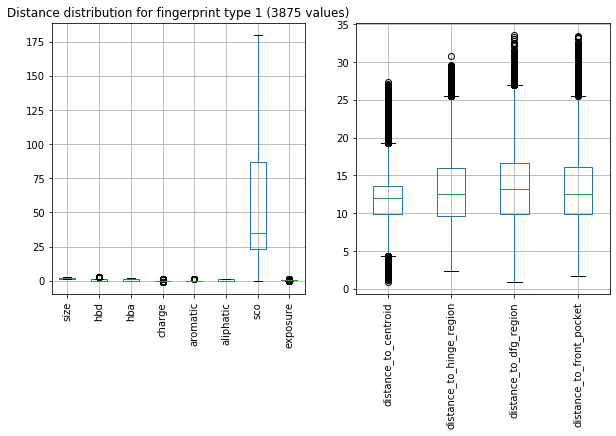

In [44]:
fig, axes = plt.subplots(figsize=(10,5),nrows=1, ncols=2)

box_plot = fp1.iloc[:, :8].plot(
    kind='box',
    title=f'Distance distribution for fingerprint type 1 ({int(len(fp1) / 85)} values)',
    ax=axes[0],
    grid=True,
    rot=90
)

box_plot = fp1.iloc[:, 8:].plot(
    kind='box',
    ax=axes[1],
    grid=True,
    rot=90
)

In [22]:
fp1_norm = get_fingerprint_type1('fingerprint_type1_normalized')

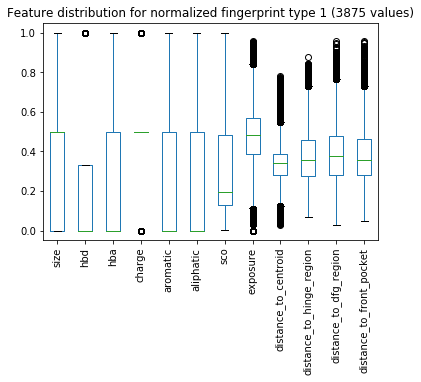

In [24]:
boxplot = fp1_norm.plot(
    kind='box',
    title=f'Feature distribution for normalized fingerprint type 1 ({int(len(fp1_norm) / 85)} values)',
    rot=90
)

## Fingerprint type 2

In [28]:
fp2 = get_fingerprint_type2('fingerprint_type2')

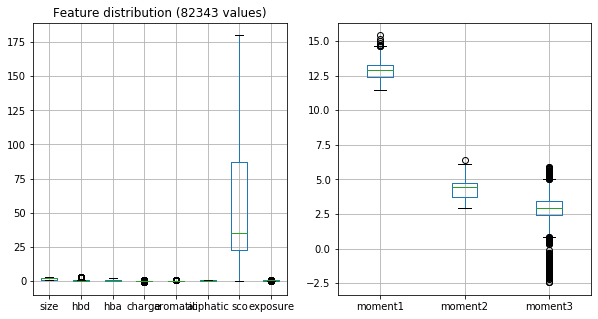

In [45]:
fig, axes = plt.subplots(figsize=(10,5),nrows=1, ncols=2)

box_plot = fp2['physchem'].plot(
    kind='box',
    title=f'Feature distribution ({int(len(fp2["physchem"]) / 4)} values)',
    ax=axes[0],
    grid=True
)

box_plot = fp2['moments'].plot(
    kind='box',
    ax=axes[1],
    grid=True
)

In [46]:
fp2_norm = get_fingerprint_type2('fingerprint_type2_normalized')

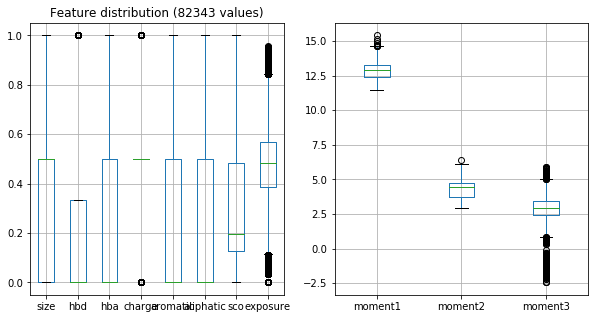

In [47]:
fig, axes = plt.subplots(figsize=(10,5),nrows=1, ncols=2)

box_plot = fp2_norm['physchem'].plot(
    kind='box',
    title=f'Feature distribution ({int(len(fp2_norm["physchem"]) / 4)} values)',
    ax=axes[0],
    grid=True
)

box_plot = fp2_norm['moments'].plot(
    kind='box',
    ax=axes[1],
    grid=True
)